In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
# 1. Load Dataset
df = pd.read_csv("data_wisata_cleaned_filtered.csv")

In [3]:
# 2. Info Umum Dataset
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1050 non-null   int64 
 1   Tempat Wisata  1050 non-null   object
 2   Tahun          1050 non-null   int64 
 3   Wisnus         1050 non-null   int64 
 4   Wisman         1050 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 41.1+ KB
None

Statistik Deskriptif:
                ID        Tahun        Wisnus        Wisman
count  1050.000000  1050.000000  1.050000e+03  1.050000e+03
mean    525.500000  2022.000000  3.210434e+04  2.210195e+04
std     303.253195     1.414887  1.420546e+05  9.683834e+04
min       1.000000  2020.000000  0.000000e+00  0.000000e+00
25%     263.250000  2021.000000  0.000000e+00  0.000000e+00
50%     525.500000  2022.000000  8.110000e+02  1.110000e+02
75%     787.750000  2023.000000  1.172725e+04  4.305250e+03
max    1050.000

In [4]:
# 3. Cek Nilai Unik & Missing
print("\nKolom Unik:")
print(df.nunique())
print("\nCek Missing Values:")
print(df.isnull().sum())


Kolom Unik:
ID               1050
Tempat Wisata     210
Tahun               5
Wisnus            672
Wisman            571
dtype: int64

Cek Missing Values:
ID               0
Tempat Wisata    0
Tahun            0
Wisnus           0
Wisman           0
dtype: int64


In [5]:
# 4. Analisis Tren Regresi Linear
def analisis_tren_regresi(df, target='Wisnus', threshold=100):
    hasil = []

    for tempat in df['Tempat Wisata'].unique():
        data = df[df['Tempat Wisata'] == tempat].sort_values('Tahun')
        X = data['Tahun'].values.reshape(-1, 1)
        y = data[target].values

        if np.all(y == 0):
            continue  # Skip jika semua nol

        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]

        # Klasifikasi tren
        if slope > threshold:
            tren = 'Naik'
        elif slope < -threshold:
            tren = 'Turun'
        else:
            tren = 'Stabil'

        hasil.append({
            'Tempat Wisata': tempat,
            'Tren': tren,
            'Slope': round(slope, 2),
            'Target': target
        })

    return pd.DataFrame(hasil)

In [6]:
# 5. Hitung dan Simpan Hasil Tren
tren_wisnus = analisis_tren_regresi(df, target='Wisnus')
tren_wisman = analisis_tren_regresi(df, target='Wisman')

print("\nContoh Tren Wisnus:")
print(tren_wisnus.head())
print("\nContoh Tren Wisman:")
print(tren_wisman.head())

tren_wisnus.to_csv('hasil_tren_wisnus.csv', index=False)
tren_wisman.to_csv('hasil_tren_wisman.csv', index=False)



Contoh Tren Wisnus:
             Tempat Wisata    Tren   Slope  Target
0              Museum Bali    Naik  5733.5  Wisnus
1         Museum Le Mayuer    Naik   679.5  Wisnus
2  Taman Budaya art centre    Naik   162.5  Wisnus
3           Pulau Serangan   Turun  -619.4  Wisnus
4        Prasasti Blanjong  Stabil     7.3  Wisnus

Contoh Tren Wisman:
             Tempat Wisata    Tren   Slope  Target
0              Museum Bali    Naik  3522.3  Wisman
1         Museum Le Mayuer    Naik   395.3  Wisman
2  Taman Budaya art centre    Naik   114.3  Wisman
3           Pulau Serangan   Turun  -540.4  Wisman
4        Prasasti Blanjong  Stabil     2.6  Wisman


In [7]:
# 6. Fungsi Visualisasi Regresi per Tempat
def plot_regresi_tempat(df, nama_tempat, target='Wisnus'):
    data = df[df['Tempat Wisata'].str.lower() == nama_tempat.lower()].sort_values('Tahun')

    if data.empty:
        print(f"Tidak ada data untuk: {nama_tempat}")
        return

    X = data['Tahun'].values.reshape(-1, 1)
    y = data[target].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data['Tahun'], y=y, color='blue', s=100, label='Data Aktual')
    sns.lineplot(x=data['Tahun'], y=y_pred, color='red', label='Garis Tren')
    plt.title(f"{target} - Regresi Linear: {nama_tempat}")
    plt.xlabel("Tahun")
    plt.ylabel("Jumlah Pengunjung")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [8]:
# 7. Visualisasi Regresi Berdasarkan ID Tempat Wisata
def plot_regresi_by_id(df, id_wisata, target='Wisnus'):
    row = df[df['ID'] == id_wisata]
    if row.empty:
        print(f"ID {id_wisata} tidak ditemukan.")
        return
    nama_tempat = row.iloc[0]['Tempat Wisata']
    plot_regresi_tempat(df, nama_tempat, target=target)

C:\Users\Wafid Adzka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Wafid Adzka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


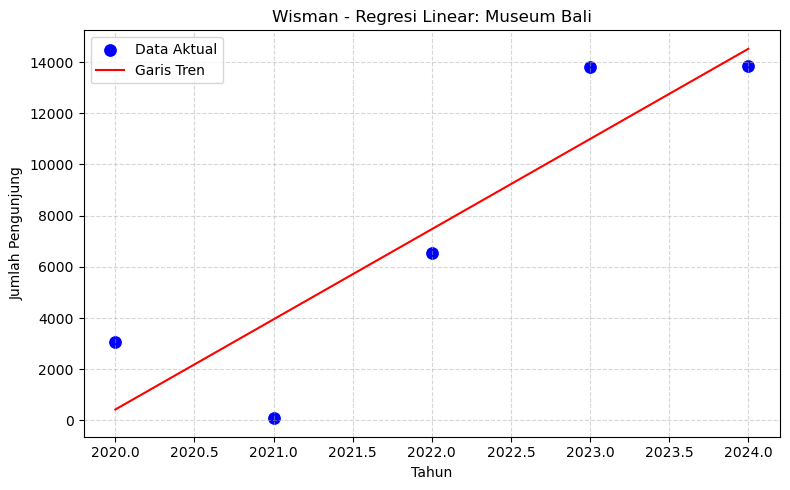

In [9]:
# Contoh penggunaan visualisasi
plot_regresi_by_id(df, 5, target='Wisman')